In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm
%matplotlib inline
from torch.utils.data import Dataset, DataLoader
import torch
import torchvision

import torch.nn as nn
import torch.optim as optim
from torch.nn import functional as F
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


# Generate dataset

In [2]:
y = np.random.randint(0,10,5000)
idx= []
for i in range(10):
    print(i,sum(y==i))
    idx.append(y==i)

0 489
1 473
2 496
3 509
4 502
5 508
6 512
7 499
8 518
9 494


In [3]:
x = np.zeros((5000,2))

In [4]:
x[idx[0],:] = np.random.multivariate_normal(mean = [2,5],cov=[[0.1,0],[0,0.1]],size=sum(idx[0]))

x[idx[1],:] = np.random.multivariate_normal(mean = [-15,-7],cov=[[0.1,0],[0,0.1]],size=sum(idx[1]))

x[idx[2],:] = np.random.multivariate_normal(mean = [2,-2],cov=[[0.1,0],[0,0.1]],size=sum(idx[2]))

x[idx[3],:] = np.random.multivariate_normal(mean = [-2,0],cov=[[0.1,0],[0,0.1]],size=sum(idx[3]))


x[idx[4],:] = np.random.multivariate_normal(mean = [15,8],cov=[[0.1,0],[0,0.1]],size=sum(idx[4]))

x[idx[5],:] = np.random.multivariate_normal(mean = [-15,6],cov=[[0.1,0],[0,0.1]],size=sum(idx[5]))

x[idx[6],:] = np.random.multivariate_normal(mean = [2,-18],cov=[[0.1,0],[0,0.1]],size=sum(idx[6]))

x[idx[7],:] = np.random.multivariate_normal(mean = [10,-10],cov=[[0.1,0],[0,0.1]],size=sum(idx[7]))

x[idx[8],:] = np.random.multivariate_normal(mean = [-10,-15],cov=[[0.1,0],[0,0.1]],size=sum(idx[8]))

x[idx[9],:] = np.random.multivariate_normal(mean = [-2,10],cov=[[0.1,0],[0,0.1]],size=sum(idx[9]))

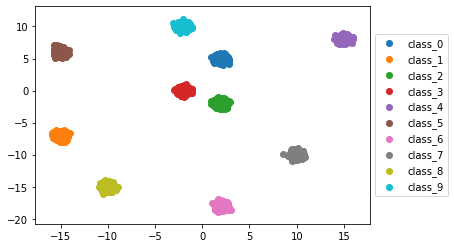

In [5]:
for i in range(10):
    plt.scatter(x[idx[i],0],x[idx[i],1],label="class_"+str(i))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [6]:
foreground_classes = {'class_0','class_1', 'class_2'}

background_classes = {'class_3','class_4', 'class_5', 'class_6','class_7', 'class_8', 'class_9'}

In [7]:
fg_class  = np.random.randint(0,3)
fg_idx = np.random.randint(0,9)

a = []
for i in range(9):
    if i == fg_idx:
        b = np.random.choice(np.where(idx[fg_class]==True)[0],size=1)
        a.append(x[b])
        print("foreground "+str(fg_class)+" present at " + str(fg_idx))
    else:
        bg_class = np.random.randint(3,10)
        b = np.random.choice(np.where(idx[bg_class]==True)[0],size=1)
        a.append(x[b])
        print("background "+str(bg_class)+" present at " + str(i))
a = np.concatenate(a,axis=0)
print(a.shape)

print(fg_class , fg_idx)

background 6 present at 0
background 7 present at 1
background 5 present at 2
background 8 present at 3
background 8 present at 4
background 6 present at 5
foreground 1 present at 6
background 7 present at 7
background 4 present at 8
(9, 2)
1 6


In [8]:
a.shape

(9, 2)

In [9]:
np.reshape(a,(18,1))

array([[  2.33741589],
       [-18.32041289],
       [  9.74351457],
       [-10.31377009],
       [-15.01471388],
       [  5.91329155],
       [ -9.38539043],
       [-15.3150671 ],
       [ -9.53175062],
       [-15.01495228],
       [  2.76160582],
       [-18.30828159],
       [-15.24285054],
       [ -6.90761097],
       [ 10.56063853],
       [-10.16327107],
       [ 15.18176153],
       [  7.84897832]])

In [10]:
a=np.reshape(a,(3,6))

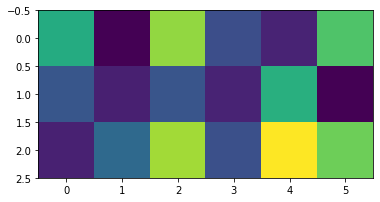

In [11]:
plt.imshow(a)

In [12]:
desired_num = 3000
mosaic_list =[]
mosaic_label = []
fore_idx=[]
for j in range(desired_num):
    fg_class  = np.random.randint(0,3)
    fg_idx = np.random.randint(0,9)
    a = []
    for i in range(9):
        if i == fg_idx:
            b = np.random.choice(np.where(idx[fg_class]==True)[0],size=1)
            a.append(x[b])
#             print("foreground "+str(fg_class)+" present at " + str(fg_idx))
        else:
            bg_class = np.random.randint(3,10)
            b = np.random.choice(np.where(idx[bg_class]==True)[0],size=1)
            a.append(x[b])
#             print("background "+str(bg_class)+" present at " + str(i))
    a = np.concatenate(a,axis=0)
    mosaic_list.append(np.reshape(a,(18,1)))
    mosaic_label.append(fg_class)
    fore_idx.append(fg_idx)

In [13]:
mosaic_list = np.concatenate(mosaic_list,axis=1).T
print(mosaic_list)

[[ 15.74467017   8.26380266 -14.8288772  ... -18.04623662   1.80424394
  -18.31794564]
 [  9.3766984   -9.84729759   2.55909158 ... -15.18977635  -9.89141711
  -15.24056267]
 [-14.58673244   6.09873196 -15.0495981  ...   5.73315658   2.12284078
   -2.01568061]
 ...
 [ 15.2016559    8.62923045   9.88220478 ...   8.02611371  -1.1531291
   10.01288835]
 [-10.16394017 -14.60310132 -14.95398523 ... -15.06153073  10.09049563
   -9.94762687]
 [-15.37023975   6.1130819    1.81761405 ...  -6.61755013  -1.81595017
   10.0699114 ]]


In [14]:
print(np.shape(mosaic_label))
print(np.shape(fore_idx))

(3000,)
(3000,)


In [15]:
class MosaicDataset(Dataset):
  """MosaicDataset dataset."""

  def __init__(self, mosaic_list, mosaic_label, fore_idx):
    """
      Args:
        csv_file (string): Path to the csv file with annotations.
        root_dir (string): Directory with all the images.
        transform (callable, optional): Optional transform to be applied
            on a sample.
    """
    self.mosaic = mosaic_list
    self.label = mosaic_label
    self.fore_idx = fore_idx

  def __len__(self):
    return len(self.label)

  def __getitem__(self, idx):
    return self.mosaic[idx] , self.label[idx], self.fore_idx[idx]

batch = 250
msd = MosaicDataset(mosaic_list, mosaic_label , fore_idx)
train_loader = DataLoader( msd,batch_size= batch ,shuffle=True)

In [16]:
class Wherenet(nn.Module):
    def __init__(self):
        super(Wherenet,self).__init__()
        self.linear1 = nn.Linear(2,4)
        self.linear2 = nn.Linear(4,8)
        self.linear3 = nn.Linear(8,1)
    def forward(self,z):
        x = torch.zeros([batch,9],dtype=torch.float64)
        y = torch.zeros([batch,2], dtype=torch.float64)
        #x,y = x.to("cuda"),y.to("cuda")
        for i in range(9):
            x[:,i] = self.helper(z[:,2*i:2*i+2])[:,0]
            #print(k[:,0].shape,x[:,i].shape)
        x = F.softmax(x,dim=1)   # alphas
        x1 = x[:,0]
        for i in range(9):
            x1 = x[:,i]          
            #print()
            y = y+torch.mul(x1[:,None],z[:,2*i:2*i+2])
        return y , x 

    
    def helper(self,x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x

    

In [17]:
trainiter = iter(train_loader)
input1,labels1,index1 = trainiter.next()



In [18]:
where = Wherenet().double()
where = where
out_where,alphas = where(input1)
out_where.shape,alphas.shape

(torch.Size([250, 2]), torch.Size([250, 9]))

In [19]:
class Whatnet(nn.Module):
    def __init__(self):
        super(Whatnet,self).__init__()
        self.linear1 = nn.Linear(2,4)
        self.linear2 = nn.Linear(4,3)
#         self.linear3 = nn.Linear(8,3)
    def forward(self,x):
        x = F.relu(self.linear1(x))
        #x = F.relu(self.linear2(x))
        x = self.linear2(x)
        return x

In [20]:
what = Whatnet().double()
what(out_where)

tensor([[ 3.1172e-01,  5.3276e-01, -4.4066e-01],
        [ 1.3697e+00,  1.2923e+00, -1.6665e+00],
        [ 6.5680e-01,  7.8053e-01, -8.4051e-01],
        [ 4.4964e-01,  6.3179e-01, -6.0047e-01],
        [ 2.5657e-01,  4.9317e-01, -3.7677e-01],
        [ 5.5276e-01,  7.0583e-01, -7.1997e-01],
        [ 3.9947e-01,  5.9577e-01, -5.4234e-01],
        [ 1.2135e-03,  3.0983e-01, -8.0883e-02],
        [ 6.4312e-01,  7.7071e-01, -8.2466e-01],
        [ 3.0495e-01,  5.2791e-01, -4.3282e-01],
        [ 7.1107e-01,  8.1949e-01, -9.0339e-01],
        [ 4.2533e-01,  6.1434e-01, -5.7231e-01],
        [ 4.2794e-01,  6.1621e-01, -5.7533e-01],
        [ 1.0209e-01,  3.8226e-01, -1.9777e-01],
        [ 6.5850e-01,  7.8175e-01, -8.4249e-01],
        [ 6.4345e-01,  7.7095e-01, -8.2505e-01],
        [ 5.2995e-01,  6.8945e-01, -6.9353e-01],
        [ 2.3834e-01,  4.8008e-01, -3.5564e-01],
        [ 6.6791e-01,  7.8851e-01, -8.5339e-01],
        [ 2.6125e-01,  4.9653e-01, -3.8219e-01],
        [ 4.2456e-01

In [21]:
test_data_required = 1000
mosaic_list_test =[]
mosaic_label_test = []
fore_idx_test=[]
for j in range(test_data_required):
    fg_class  = np.random.randint(0,3)
    fg_idx = np.random.randint(0,9)
    a = []
    for i in range(9):
        if i == fg_idx:
            b = np.random.choice(np.where(idx[fg_class]==True)[0],size=1)
            a.append(x[b])
#             print("foreground "+str(fg_class)+" present at " + str(fg_idx))
        else:
            bg_class = np.random.randint(3,10)
            b = np.random.choice(np.where(idx[bg_class]==True)[0],size=1)
            a.append(x[b])
#             print("background "+str(bg_class)+" present at " + str(i))
    a = np.concatenate(a,axis=0)
    mosaic_list_test.append(np.reshape(a,(18,1)))
    mosaic_label_test.append(fg_class)
    fore_idx_test.append(fg_idx)

In [22]:
mosaic_list_test = np.concatenate(mosaic_list_test,axis=1).T
print(mosaic_list_test.shape)

(1000, 18)


In [23]:
test_data = MosaicDataset(mosaic_list_test,mosaic_label_test,fore_idx_test)
test_loader = DataLoader( test_data,batch_size= batch ,shuffle=False)

In [24]:

focus_true_pred_true =0
focus_false_pred_true =0
focus_true_pred_false =0
focus_false_pred_false =0

argmax_more_than_half = 0
argmax_less_than_half =0

col1=[]
col2=[]
col3=[]
col4=[]
col5=[]
col6=[]
col7=[]
col8=[]
col9=[]
col10=[]
col11=[]
col12=[]
col13=[]

criterion = nn.CrossEntropyLoss()
optimizer_where = optim.SGD(where.parameters(), lr=0.01, momentum=0.9)
optimizer_what = optim.SGD(what.parameters(), lr=0.01, momentum=0.9)

nos_epochs = 80

train_loss=[]
test_loss =[]
train_acc = []
test_acc = []
for epoch in range(nos_epochs):  # loop over the dataset multiple times

    focus_true_pred_true =0
    focus_false_pred_true =0
    focus_true_pred_false =0
    focus_false_pred_false =0

    argmax_more_than_half = 0
    argmax_less_than_half =0

    running_loss = 0.0
    cnt=0

    iteration = desired_num // batch

    #training data set

    for i, data in  enumerate(train_loader):
        inputs , labels , fore_idx = data
        #inputs,labels,fore_idx = inputs.to(device),labels.to(device),fore_idx.to(device)
        # zero the parameter gradients

        optimizer_what.zero_grad()
        optimizer_where.zero_grad()
        
        
        avg_inp,alphas = where(inputs)
        
        outputs = what(avg_inp)
        
        _, predicted = torch.max(outputs.data, 1)
        
        loss = criterion(outputs, labels) 
        loss.backward() 
        
        optimizer_what.step()
        optimizer_where.step() 
        

        running_loss += loss.item()
        if cnt % 6 == 5:    # print every 6 mini-batches
            print('[%d, %5d] loss: %.3f' %(epoch + 1, cnt + 1, running_loss / 6))
            running_loss = 0.0
        cnt=cnt+1
    
        if epoch % 5 == 4:
            for j in range (batch):
                focus = torch.argmax(alphas[j])

                if(alphas[j][focus] >= 0.5):
                    argmax_more_than_half +=1
                else:
                    argmax_less_than_half +=1

                if(focus == fore_idx[j] and predicted[j] == labels[j]):
                    focus_true_pred_true += 1

                elif(focus != fore_idx[j] and predicted[j] == labels[j]):
                    focus_false_pred_true +=1

                elif(focus == fore_idx[j] and predicted[j] != labels[j]):
                    focus_true_pred_false +=1

                elif(focus != fore_idx[j] and predicted[j] != labels[j]):
                    focus_false_pred_false +=1

    if epoch % 5 == 4:
        col1.append(epoch)
        col2.append(argmax_more_than_half)
        col3.append(argmax_less_than_half)
        col4.append(focus_true_pred_true)
        col5.append(focus_false_pred_true)
        col6.append(focus_true_pred_false)
        col7.append(focus_false_pred_false)

    #************************************************************************
        #testing data set  
        with torch.no_grad():
            focus_true_pred_true =0
            focus_false_pred_true =0
            focus_true_pred_false =0
            focus_false_pred_false =0

            argmax_more_than_half = 0
            argmax_less_than_half =0
            for data in test_loader:
                inputs, labels , fore_idx = data
                #inputs,labels,fore_idx = inputs.to(device),labels.to(device),fore_idx.to(device) 
#                 print(inputs.shtorch.save(where.state_dict(),"model_epoch"+str(epoch)+".pt")ape,labels.shape)
                avg_inp,alphas = where(inputs)
                outputs = what(avg_inp)
                _, predicted = torch.max(outputs.data, 1)

                for j in range (batch):
                    focus = torch.argmax(alphas[j])

                    if(alphas[j][focus] >= 0.5):
                        argmax_more_than_half +=1
                    else:
                        argmax_less_than_half +=1

                    if(focus == fore_idx[j] and predicted[j] == labels[j]):
                        focus_true_pred_true += 1

                    elif(focus != fore_idx[j] and predicted[j] == labels[j]):
                        focus_false_pred_true +=1

                    elif(focus == fore_idx[j] and predicted[j] != labels[j]):
                        focus_true_pred_false +=1

                    elif(focus != fore_idx[j] and predicted[j] != labels[j]):
                        focus_false_pred_false +=1

        col8.append(argmax_more_than_half)
        col9.append(argmax_less_than_half)
        col10.append(focus_true_pred_true)
        col11.append(focus_false_pred_true)
        col12.append(focus_true_pred_false)
        col13.append(focus_false_pred_false)
        torch.save(where.state_dict(),"where_model_epoch"+str(epoch)+".pt")
        torch.save(what.state_dict(),"what_model_epoch"+str(epoch)+".pt")
    
print('Finished Training')
torch.save(where.state_dict(),"where_model_epoch"+str(nos_epochs)+".pt")
torch.save(what.state_dict(),"what_model_epoch"+str(epoch)+".pt")


[1,     6] loss: 1.258
[1,    12] loss: 1.141
[2,     6] loss: 1.106
[2,    12] loss: 1.080
[3,     6] loss: 1.062
[3,    12] loss: 1.027
[4,     6] loss: 0.976
[4,    12] loss: 0.909
[5,     6] loss: 0.763
[5,    12] loss: 0.602
[6,     6] loss: 0.475
[6,    12] loss: 0.455
[7,     6] loss: 0.427
[7,    12] loss: 0.420
[8,     6] loss: 0.405
[8,    12] loss: 0.364
[9,     6] loss: 0.356
[9,    12] loss: 0.319
[10,     6] loss: 0.295
[10,    12] loss: 0.274
[11,     6] loss: 0.236
[11,    12] loss: 0.227
[12,     6] loss: 0.195
[12,    12] loss: 0.161
[13,     6] loss: 0.141
[13,    12] loss: 0.123
[14,     6] loss: 0.105
[14,    12] loss: 0.091
[15,     6] loss: 0.083
[15,    12] loss: 0.073
[16,     6] loss: 0.068
[16,    12] loss: 0.062
[17,     6] loss: 0.058
[17,    12] loss: 0.054
[18,     6] loss: 0.055
[18,    12] loss: 0.044
[19,     6] loss: 0.045
[19,    12] loss: 0.044
[20,     6] loss: 0.038
[20,    12] loss: 0.044
[21,     6] loss: 0.039
[21,    12] loss: 0.038
[22,     6

In [25]:
columns = ["epochs", "argmax > 0.5" ,"argmax < 0.5", "focus_true_pred_true", "focus_false_pred_true", "focus_true_pred_false", "focus_false_pred_false" ]
df_train = pd.DataFrame()
df_test = pd.DataFrame()
df_train[columns[0]] = col1
df_train[columns[1]] = col2
df_train[columns[2]] = col3
df_train[columns[3]] = col4
df_train[columns[4]] = col5
df_train[columns[5]] = col6
df_train[columns[6]] = col7

df_test[columns[0]] = col1
df_test[columns[1]] = col8
df_test[columns[2]] = col9
df_test[columns[3]] = col10
df_test[columns[4]] = col11
df_test[columns[5]] = col12
df_test[columns[6]] = col13

In [26]:
df_train

,epochs,argmax > 0.5,argmax < 0.5,focus_true_pred_true,focus_false_pred_true,focus_true_pred_false,focus_false_pred_false
0,4,398,2602,1014,990,46,950
1,9,1491,1509,1595,1231,84,90
2,14,1751,1249,2528,468,3,1
3,19,2108,892,2162,835,2,1
4,24,2218,782,2115,885,0,0
5,29,2260,740,2088,911,1,0
6,34,2266,734,2070,930,0,0
7,39,2332,668,2075,925,0,0
8,44,2312,688,2057,943,0,0
9,49,2398,602,2058,942,0,0


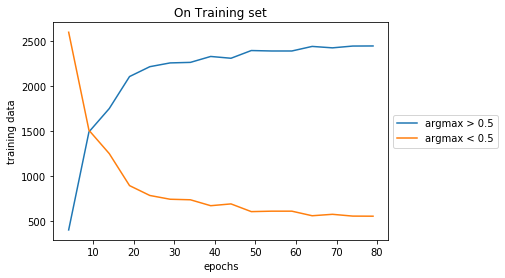

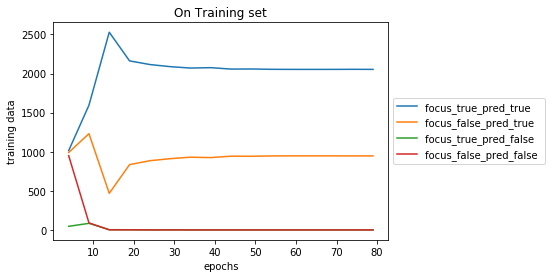

In [27]:
plt.plot(col1,col2, label='argmax > 0.5')
plt.plot(col1,col3, label='argmax < 0.5')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("epochs")
plt.ylabel("training data")
plt.title("On Training set")
plt.show()

plt.plot(col1,col4, label ="focus_true_pred_true ")
plt.plot(col1,col5, label ="focus_false_pred_true ")
plt.plot(col1,col6, label ="focus_true_pred_false ")
plt.plot(col1,col7, label ="focus_false_pred_false ")
plt.title("On Training set")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("epochs")
plt.ylabel("training data")
plt.show()

In [28]:
df_test

,epochs,argmax > 0.5,argmax < 0.5,focus_true_pred_true,focus_false_pred_true,focus_true_pred_false,focus_false_pred_false
0,4,356,644,369,413,1,217
1,9,492,508,557,406,12,25
2,14,611,389,839,160,1,0
3,19,717,283,731,268,1,0
4,24,738,262,704,295,1,0
5,29,749,251,699,300,1,0
6,34,793,207,703,297,0,0
7,39,767,233,698,301,1,0
8,44,820,180,702,298,0,0
9,49,811,189,699,301,0,0


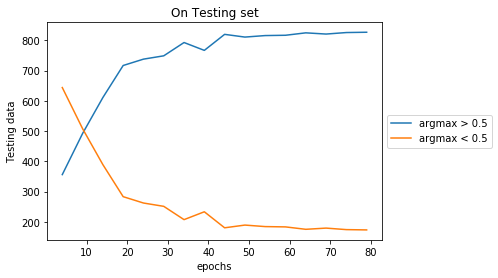

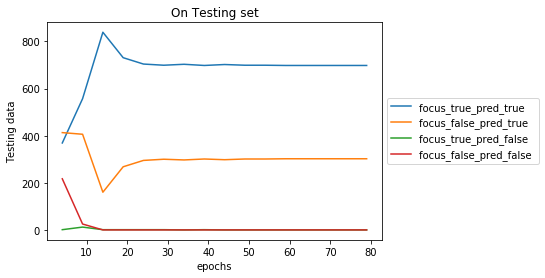

In [29]:
plt.plot(col1,col8, label='argmax > 0.5')
plt.plot(col1,col9, label='argmax < 0.5')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("epochs")
plt.ylabel("Testing data")
plt.title("On Testing set")
plt.show()

plt.plot(col1,col10, label ="focus_true_pred_true ")
plt.plot(col1,col11, label ="focus_false_pred_true ")
plt.plot(col1,col12, label ="focus_true_pred_false ")
plt.plot(col1,col13, label ="focus_false_pred_false ")
plt.title("On Testing set")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("epochs")
plt.ylabel("Testing data")
plt.show()

In [30]:
print(x[0])

[-1.68754943 10.08013263]


In [31]:
for i in range(9):
    print(x[0,2*i:2*i+2])

[-1.68754943 10.08013263]
[]
[]
[]
[]
[]
[]
[]
[]
